
## Arquivo criado para entendimento dos dados de Treinamento e Validação

### Features de entrada

    product_id         Product numeric identification

    seller_id	       Seller numeric identification

    query	           The text inserted by users

    search_page	       The page number the product appeared (min 1 and max 5)

    position	       The position the product appeared in the search page (min 0 and max 38)

    title	           Product title

    concatenated_tags  Product tags inserted by the seller

    creation_date	   The date of product registration in Elo7 platform

    price	           The product price (R$)

    weight	           The weight (grams) of a product unit

    express_delivery   Indicates if the product has already been made (1) or not (0)

    minimum_quantity   The minimum quantity the seller sells the product

    view_counts	       The number of times the product was clicked in the last three months

    order_counts	   The number of times the product was purchased in the last three months


### Target para classificação

    category	       Product category

0 - Importar Bibliotecas

1 - Dados de Treinamento

2 - Dados de Validação



## 0 - Importar Bibliotecas

In [3]:
# Bibliotecas

import os
import pandas as pd
import seaborn as sns

## 1 - Dados de Treinamento

In [2]:
# Carga do dataset de Treinamento

sample_products_csv = os.environ['DATASET_PATH']
df = pd.read_csv(sample_products_csv)

In [3]:
# Informações gerais

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         38000 non-null  int64  
 1   seller_id          38000 non-null  int64  
 2   query              38000 non-null  object 
 3   search_page        38000 non-null  int64  
 4   position           38000 non-null  int64  
 5   title              38000 non-null  object 
 6   concatenated_tags  37998 non-null  object 
 7   creation_date      38000 non-null  object 
 8   price              38000 non-null  float64
 9   weight             37942 non-null  float64
 10  express_delivery   38000 non-null  int64  
 11  minimum_quantity   38000 non-null  int64  
 12  view_counts        38000 non-null  int64  
 13  order_counts       17895 non-null  float64
 14  category           38000 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 4.3+ MB


In [37]:
## Missing Values

miss_concatenated_tags = len(df.index) - df['concatenated_tags'].count()
miss_weight = len(df.index) - df['weight'].count()
miss_order_counts = len(df.index) - df['order_counts'].count()

print(f'Concatedated_tags missing = {miss_concatenated_tags}')
print(f'Weight missing = {miss_weight}')
print(f'Order_counts missing = {miss_order_counts}')

Concatedated_tags missing = 2
Weight missing = 58
Order_counts missing = 20105


In [4]:
df

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37995,13230578,1756482,mochila personalizada galinha pintadinha,1,2,Mochila Galinha Pintadinha M,primaria 2019 1 aninho abdulzinho mochilas ani...,2016-09-17 10:49:39,18.790000,149.0,1,27,321,NaN,Lembrancinhas
37996,6736914,9301388,tag dia dos pais,1,32,30 TAGS DIA DOS PAIS 005,dia pais,2019-06-12 17:03:52,31.680000,7.0,1,1,43,NaN,Papel e Cia
37997,11017911,8732362,kit bolsa maternidade,5,31,Kit bolsa bebê maternidade personalizada,paula carvalho bebe,2018-08-24 11:43:00,543.170000,3006.0,1,4,515,18.0,Bebê
37998,6807331,1869417,festa 15 anos,1,8,Chaveiro Almofada 15 anos,yasmin centro mesa compras 15 anos 2020 lembra...,2017-10-21 18:49:56,10.720000,18.0,1,53,2456,138.0,Lembrancinhas


In [5]:
df.columns.to_list()

['product_id',
 'seller_id',
 'query',
 'search_page',
 'position',
 'title',
 'concatenated_tags',
 'creation_date',
 'price',
 'weight',
 'express_delivery',
 'minimum_quantity',
 'view_counts',
 'order_counts',
 'category']

In [25]:
##  Data de registro do produto na plataforma Elo7

print(max(df['creation_date']))
print(min(df['creation_date']))

2020-01-03 12:31:05
2008-11-05 22:57:17



### Estatística descritiva dos campos numéricos

- Medidas de centralidade
- Correlação


In [7]:
df.describe()

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
count,3.800000e+04,3.800000e+04,38000.000000,38000.000000,38000.000000,37942.000000,38000.000000,38000.000000,38000.000000,17895.000000
mean,8.345497e+06,5.008433e+06,1.491447,16.887368,84.042358,360.885799,0.780421,14.602263,546.603895,27.410673
std,4.836141e+06,2.947651e+06,0.979852,11.589415,212.491007,1809.632834,0.413967,43.970316,1423.711338,60.794616
min,3.610000e+02,8.170000e+02,1.000000,0.000000,0.070000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.142094e+06,2.469703e+06,1.000000,6.000000,12.750000,6.000000,1.000000,3.000000,118.000000,8.000000
50%,8.378994e+06,4.917720e+06,1.000000,16.000000,28.500000,9.000000,1.000000,7.000000,242.000000,15.000000
75%,1.253675e+07,7.636478e+06,2.000000,27.000000,90.000000,107.000000,1.000000,16.000000,521.000000,26.000000
max,1.669295e+07,1.011887e+07,5.000000,38.000000,11509.380000,65009.000000,1.000000,3000.000000,45010.000000,2460.000000


<AxesSubplot:>

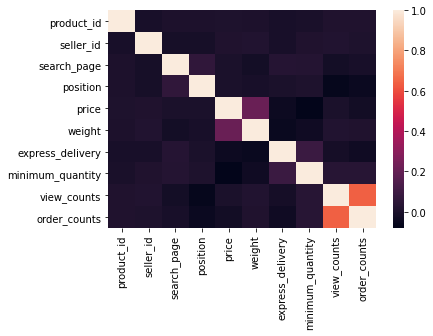

In [18]:
sns.heatmap(df.corr())

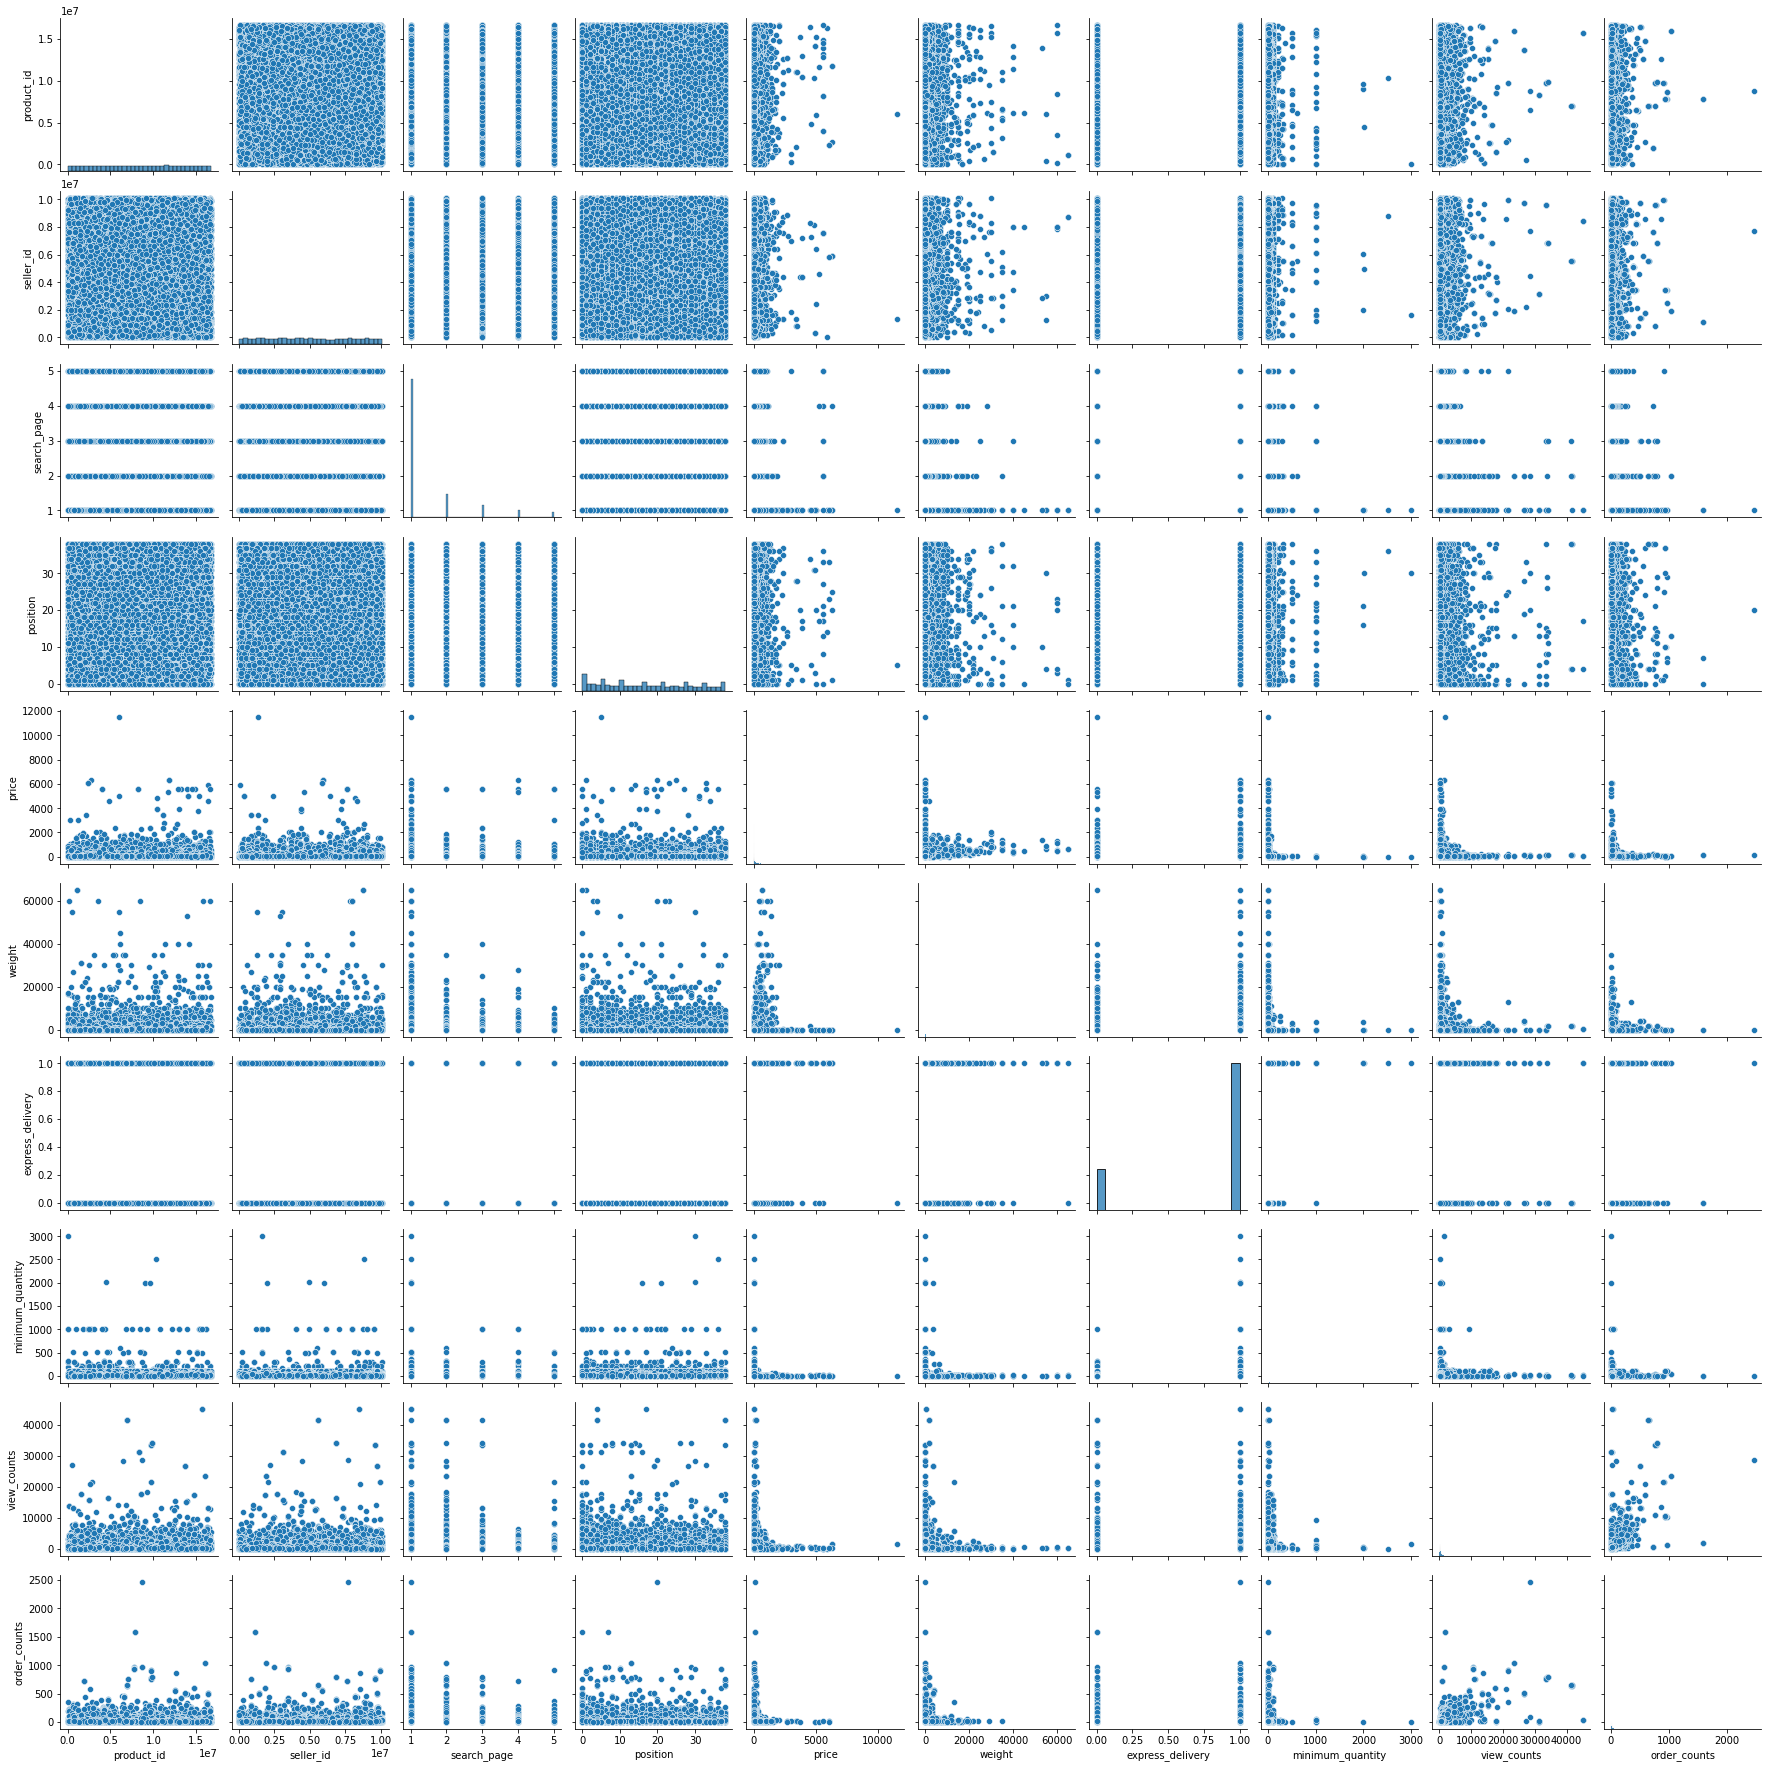

In [20]:
sns.pairplot(data=df, kind="scatter", palette="Set1")


### Contagem dos valores dos campos categóricos


In [9]:
df['query'].value_counts()

bolsa maternidade                    153
dia dos pais                         147
batizado                             125
porta maternidade                    125
lembrancinha dia dos pais            124
                                    ... 
cordao para cracha                     1
porta lingerie sujinhas limpinhas      1
refil caderno inteligente              1
avental personalizado bordado          1
kit personalizado para festa           1
Name: query, Length: 6377, dtype: int64

In [10]:
df['title'].value_counts()

Lembrancinha Batizado                                66
Caneta Personalizada                                 58
Caneca Personalizada - Lembrancinha Personalizada    56
Lembrancinha Maternidade                             52
Caneca Dia dos Pais                                  52
                                                     ..
Caneca Pai Para Uso Exclusivo do Melhor               1
Organizador de brinquedos emoji                       1
Adesivo Recorte Vitrine Dia dos pais                  1
Dia dos Pais - Charutos Chocolate caixa               1
Tapete em croche para cozinha                         1
Name: title, Length: 25113, dtype: int64

In [11]:
df['concatenated_tags'].value_counts()

dia pais                                                                         802
lembrancinhas                                                                    195
batizado                                                                         115
tapetes                                                                           88
decoracao                                                                         71
                                                                                ... 
frases quadro familia quadro frases decoracao casa quadro frases temas             1
dossel mosquiteiro baby mosquiteiro teto mosquiteiro dossel                        1
helena j vinicius leonardo bolsa maternidade menino kit maternidade                1
smash the cake designer moda newborn tapa fraldas bita princesinha mundo bita      1
kits variados coruja festa pijama lembrancinha                                     1
Name: concatenated_tags, Length: 22795, dtype: int64

In [21]:
df['category'].value_counts()

Lembrancinhas         17524
Decoração              8723
Bebê                   6930
Papel e Cia            2750
Outros                 1133
Bijuterias e Jóias      940
Name: category, dtype: int64

## 2 - Dados de Validação

In [4]:
# Carga do Dataset de validação

test_products_csv = os.environ['TEST_PATH']
df_test = pd.read_csv(test_products_csv)

In [5]:
# Informações gerais

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         500 non-null    int64  
 1   seller_id          500 non-null    int64  
 2   query              500 non-null    object 
 3   search_page        500 non-null    int64  
 4   position           500 non-null    int64  
 5   title              500 non-null    object 
 6   concatenated_tags  500 non-null    object 
 7   creation_date      500 non-null    object 
 8   price              500 non-null    float64
 9   weight             500 non-null    float64
 10  express_delivery   500 non-null    int64  
 11  minimum_quantity   500 non-null    int64  
 12  view_counts        500 non-null    int64  
 13  order_counts       219 non-null    float64
 14  category           500 non-null    object 
dtypes: float64(3), int64(7), object(5)
memory usage: 58.7+ KB


In [6]:
## Missing Values

df_test.isnull().sum()

product_id             0
seller_id              0
query                  0
search_page            0
position               0
title                  0
concatenated_tags      0
creation_date          0
price                  0
weight                 0
express_delivery       0
minimum_quantity       0
view_counts            0
order_counts         281
category               0
dtype: int64

In [7]:
df_test

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,4973768,2484177,lembrancinhas de 15 anos,5,8,Lembrancinha 15 anos - Lembrancinha de 15 anos,15 anos,2019-02-02 10:28:57,14.180000,10.0,1,13,91,NaN,Lembrancinhas
1,14180109,3191400,prateleira,1,32,Trio de Nichos Prateleira,prateleiras decoracao gaveteiros nichos pratel...,2017-08-23 22:17:01,97.060005,7492.0,1,1,729,32.0,Decoração
2,5058490,1414443,lembrancinhas vingadores,2,19,Caixa meia bala Vingadores,vingadores super herois,2017-05-28 04:26:03,11.580000,0.0,1,13,92,NaN,Lembrancinhas
3,576188,9188811,sacolinha galinha pintadinha,1,6,Sacolinha Galinha Pintadinha,sacolinhas galinha pintadinha sacolinhas perso...,2017-02-14 10:19:28,13.390000,8.0,1,15,34,NaN,Lembrancinhas
4,5190417,2497208,vaso de barro atacado,1,23,30 Mini Vaso 6cm Cerâmica Lembrancinha casamen...,cha bebe lhama mini vasos c adesivos,2018-10-19 00:22:33,11.470000,2009.0,1,39,741,NaN,Lembrancinhas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,726319,4527735,lembrancinhas de igreja dia dos pais,2,14,Dia dos pais,dia pais,2016-07-09 22:06:53,15.770000,8.0,1,10,279,NaN,Lembrancinhas
496,5702671,2857393,porta fraldas,1,34,Porta fraldas para bolsa,porta fraldas bebe porta fraldas portatil kit ...,2016-05-29 11:02:11,59.880000,6.0,1,1,248,NaN,Bebê
497,11130757,9865080,espelho adnet,1,9,Espelho Adnet 40 cm - Marrom com Alça Caramelo,espelho sala decorar decoracao,2018-09-06 11:38:39,258.520000,2000.0,0,6,947,141.0,Decoração
498,2739553,7358636,polaina tricot,1,0,Polainas em Tricô,polainas,2013-07-15 16:58:47,55.870000,0.0,0,1,176,NaN,Bebê


In [8]:
df_test.columns.to_list()

['product_id',
 'seller_id',
 'query',
 'search_page',
 'position',
 'title',
 'concatenated_tags',
 'creation_date',
 'price',
 'weight',
 'express_delivery',
 'minimum_quantity',
 'view_counts',
 'order_counts',
 'category']

In [9]:
##  Data de registro do produto na plataforma Elo7

print(max(df_test['creation_date']))
print(min(df_test['creation_date']))

2019-11-28 23:34:16
2011-10-16 17:58:46



### Estatística descritiva dos campos numéricos

- Medidas de centralidade
- Correlação

In [10]:
df_test.describe()

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
count,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,219.000000
mean,8.110617e+06,5.090983e+06,1.532000,17.016000,85.530100,437.540000,0.796000,14.020000,465.184000,25.155251
std,4.730000e+06,2.962845e+06,1.038814,11.474104,152.884457,2539.212731,0.403373,24.163098,686.925352,33.505766
min,8.584300e+04,4.310000e+03,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,4.139376e+06,2.494708e+06,1.000000,6.000000,12.930000,6.750000,1.000000,4.000000,126.500000,9.000000
50%,8.044020e+06,4.885221e+06,1.000000,17.000000,27.905000,9.000000,1.000000,8.000000,248.000000,15.000000
75%,1.206843e+07,7.859568e+06,2.000000,27.000000,94.390000,100.000000,1.000000,16.000000,502.250000,26.500000
max,1.665903e+07,1.010018e+07,5.000000,38.000000,1909.760000,48009.000000,1.000000,304.000000,5603.000000,298.000000


<AxesSubplot:>

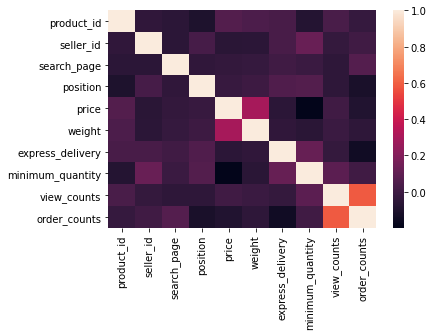

In [11]:
sns.heatmap(df_test.corr())

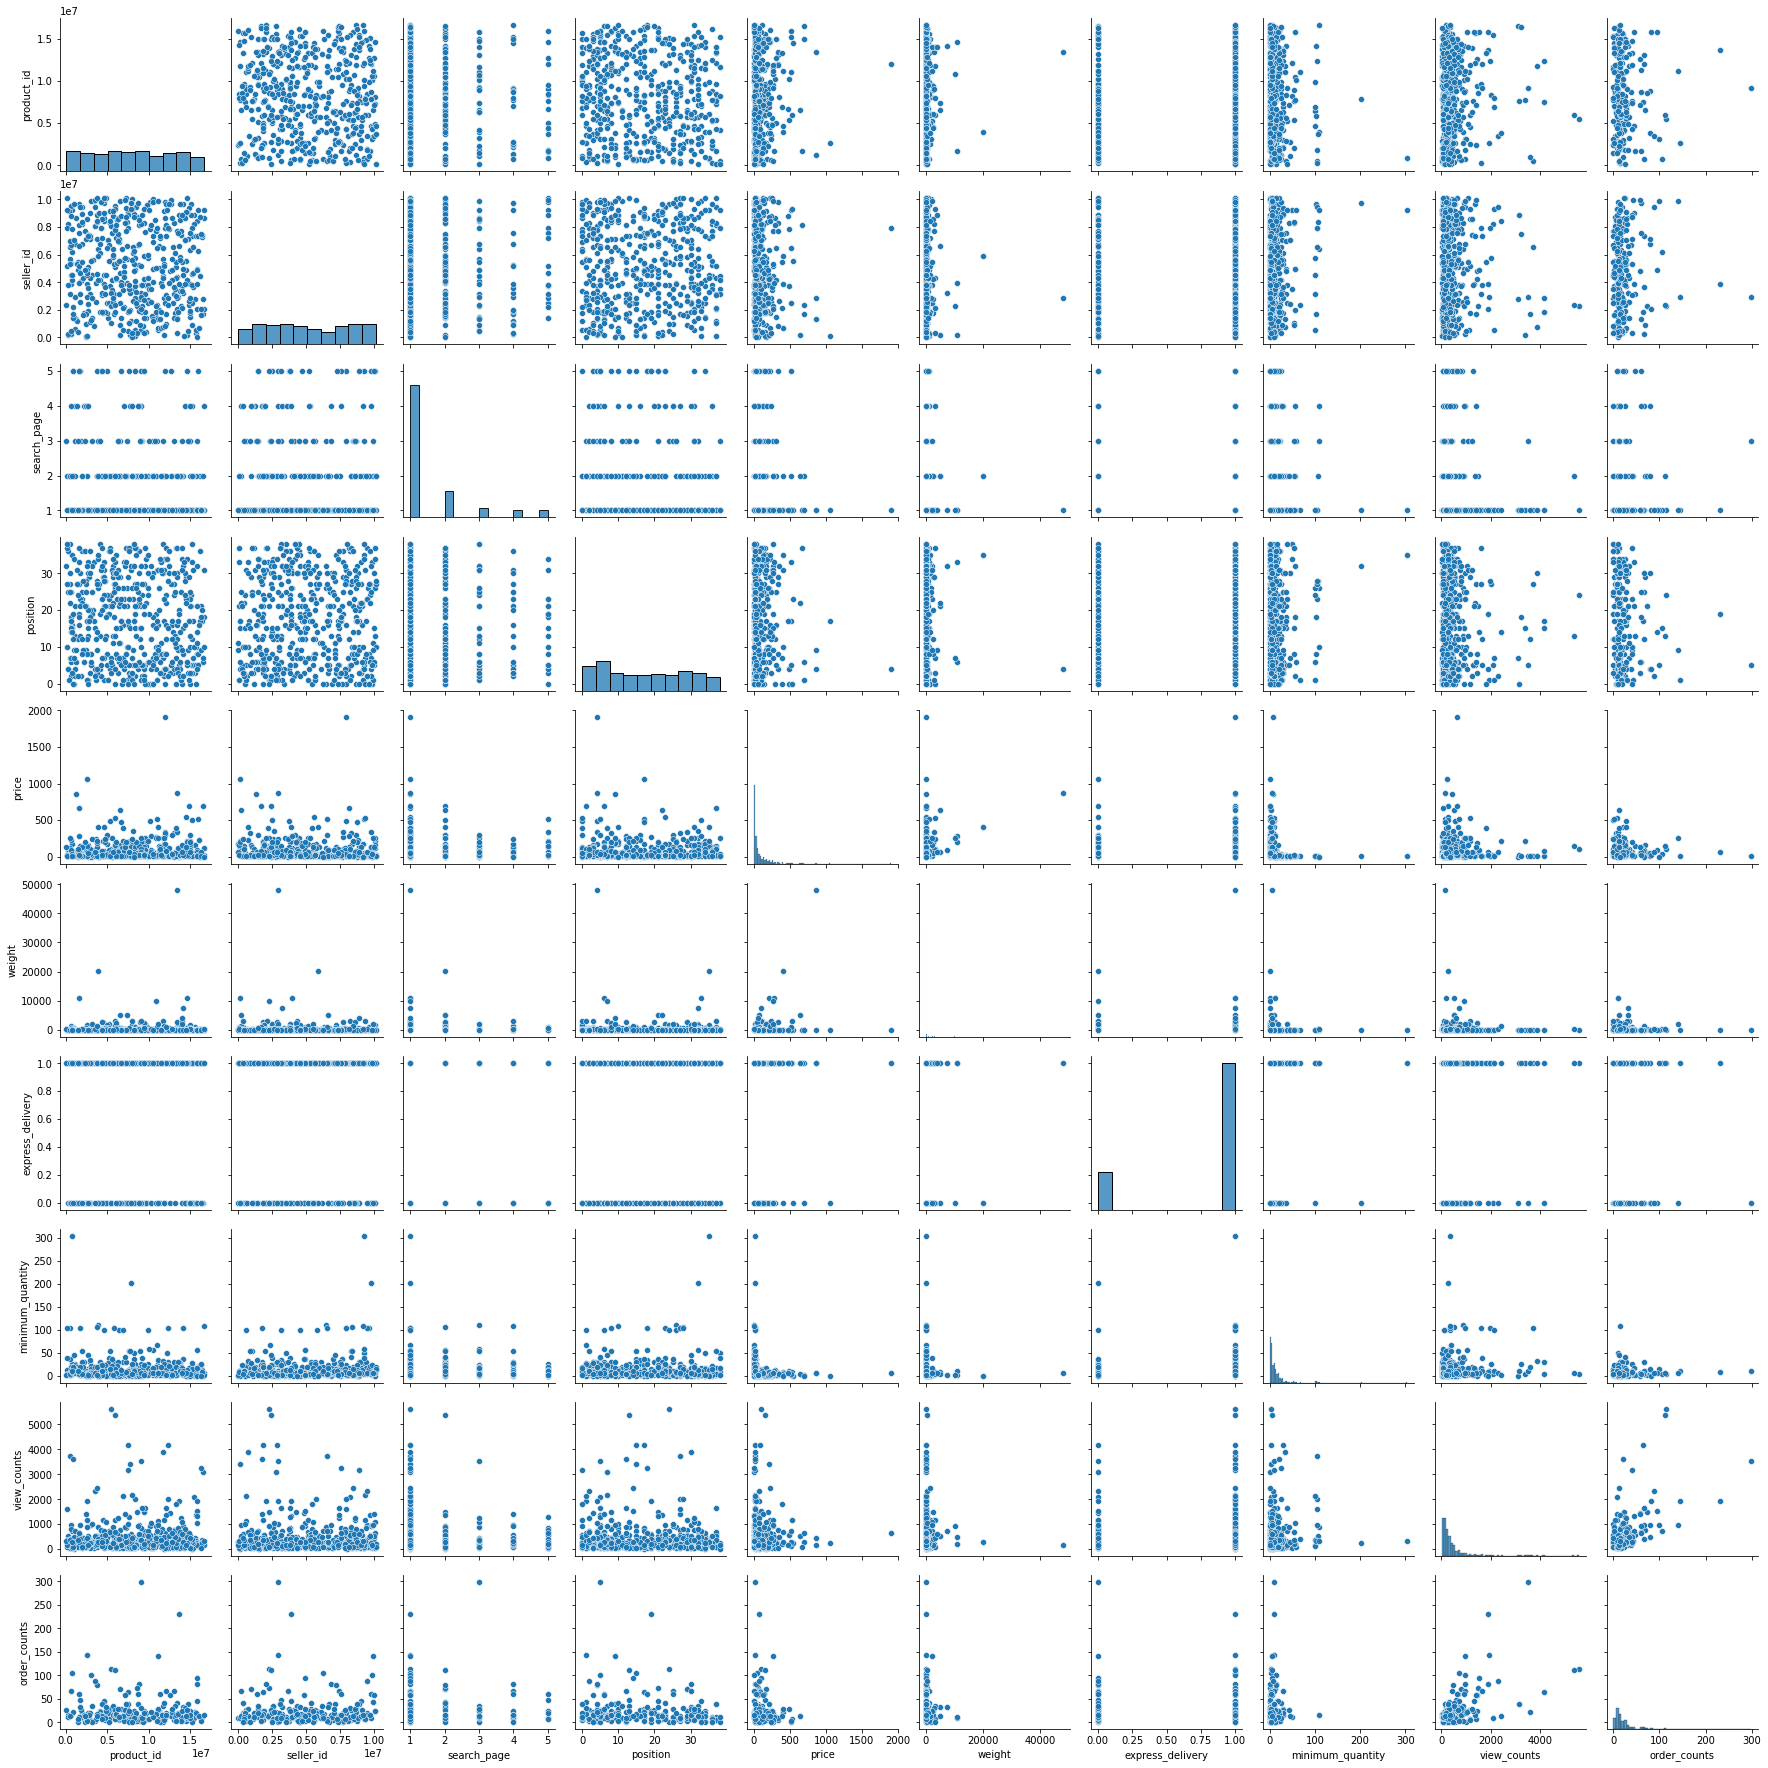

In [12]:
sns.pairplot(data=df_test, kind="scatter", palette="Set1")

### Contagem dos valores dos campos categóricos

In [13]:
df_test['query'].value_counts()

saida de maternidade         4
caneca dia dos pais          4
kit dia dos pais             3
lembrancinha                 3
lembrancinha dia dos pais    3
                            ..
adesivo vende se carro       1
caixa bala                   1
casaquinho bebe croche       1
biombo                       1
enxoval de bebe              1
Name: query, Length: 448, dtype: int64

In [14]:
df_test['title'].value_counts()

Caneca Dia dos Pais                                             3
Aquário de Garrafa                                              2
COPO LONG DRINK 320ML PERSONALIZADO                             2
Caneca Personalizada Dia dos pais -Lembrancinha Dia dos Pais    2
Caixa personalizada Dia dos pais                                2
                                                               ..
SANDÁLIA PERSONALIZADA DIA DOS PAIS                             1
CANETA PERSONALIZADA                                            1
KIT FESTA BRANCA DE NEVE                                        1
Adesivo Decoração Quarto Infantil Menina Cilios Com Nome        1
Latas personalizadas lol surprise                               1
Name: title, Length: 489, dtype: int64

In [15]:
df_test['concatenated_tags'].value_counts()

dia pais                                             11
almofadas                                             2
cortina                                               2
sandalia dia pais                                     2
aquario                                               2
                                                     ..
brinde corporativo dia pais lembrancinhas casorio     1
jogos cozinha jogo cozinha                            1
15 anos                                               1
convites personalizados convite personalizado         1
kit higiene bebe baby kit higiene minnie bebe         1
Name: concatenated_tags, Length: 478, dtype: int64

In [16]:
df_test['category'].value_counts()

Lembrancinhas         230
Decoração             122
Bebê                   95
Papel e Cia            27
Outros                 15
Bijuterias e Jóias     11
Name: category, dtype: int64